<a href="https://colab.research.google.com/github/chandramohan0/PythonZeroToPandasProject/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1CtpsWZCnRDqv9j2UO0ulog2XG6EIfQff')

     |████████████████████████████████| 71kB 3.4MB/s 


# Air Quality Data In India

### This project is related to analysis of air quality index of various cities of India. The dataset is downloaded from 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' and the data will be analyzed with the help of Numpy, Pandas, Matplotlib,Seaborn, Jovian etc. libraries.  

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' 

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chandramohan01
Your Kaggle Key: ··········


  7%|▋         | 5.00M/72.9M [00:00<00:01, 39.4MB/s]

100%|██████████| 72.9M/72.9M [00:00<00:00, 128MB/s] 


The dataset has been downloaded and extracted.

In [10]:
# Change this
data_dir = './air-quality-data-in-india'

In [11]:
import os
os.listdir(data_dir)

['city_hour.csv',
 'stations.csv',
 'station_hour.csv',
 'station_day.csv',
 'city_day.csv']

Let us save and upload our work to Jovian before continuing.

In [12]:
project_name = "air-quality-data-in-india" # change this (use lowercase letters and hyphens only)

In [13]:
!pip install jovian --upgrade -q

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'

# Analysis of Air Quality Data  in India

#### This dataset is related to the air pollution in INDIA. You can the dataset from Air Pollution Dataset. Here I am going to analyse the pollution in different of INDIA. I have learnt Data analytics using python from jovian.ml



## Importing the required libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline

# <a id='aqi'>1. What is AQI?</a>
<img src='https://media.giphy.com/media/b5xDLakZRxJ6M/giphy.gif' width=500px height=300px>

Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.

The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. The color makes it easy for people to quickly determine whether air quality is reaching unhealthy levels in their communities.

### Loading the Dataset

###### Here we load the dataset using the pandas helper function (pd.read_csv('filename.csv')) ,here the filename is in the same directory so need not mention the path explicitly

In [17]:
air_pollution_df = pd.read_csv('./air-quality-data-in-india/city_day.csv')
air_pollution_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Basic information about the dataset

##### It returns the name of all the columns in the dataset along with the Dtype(Data type). Here we can see that the type of the date is an object, we will convert that to an Date type in further cells.

In [18]:
air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### Describing the dataset

##### Here we are using the describe helper function which gives the basic idea of the dataset.

In [19]:
air_pollution_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### Cleaning The Dataset

##### Here we going to convert the type of Date column to datetime64 type using the helper function pd.to_datetime(air_pollution_df1.Date, format='%Y-%m-%d') .

In [20]:
air_pollution_df1 = air_pollution_df
air_pollution_df1.Date = pd.to_datetime(air_pollution_df1.Date, format='%Y-%m-%d')
air_pollution_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

## Missing Values

In [21]:
air_pollution_df1.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## Handling the missing data

#### we will be hangling the mising values using interpolate function

In [22]:
air_pollution_df1.interpolate(limit_direction = "both", inplace = True)
air_pollution_df1["AQI_Bucket"] = air_pollution_df1["AQI_Bucket"].fillna("Nill") #Replacing NAN with Nill 
# air_pollution_df
air_pollution_df1.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

###  Now we adding the values in columns(Benzene,Toulene,Xylene) into a single column "BTX".

In [23]:
air_pollution_df1['BTX'] = air_pollution_df1['Benzene'] + air_pollution_df1['Toluene'] + air_pollution_df1['Xylene']
air_pollution_df1 = air_pollution_df1.drop(['Benzene','Toluene','Xylene'],axis=1)

### In the below cell we adding the values in columns(PM2.5,PM10) into a single column "Particulate_Matter".

In [24]:
air_pollution_df1['Particulate_Matter'] = air_pollution_df1['PM2.5'] + air_pollution_df1['PM10']
air_pollution_df1 

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,209.0,Nill,0.02,214.78
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,209.0,Nill,12.95,214.78
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,209.0,Nill,25.45,214.78
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,209.0,Nill,15.57,214.78
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,209.0,Nill,28.68,214.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good,15.04,65.96
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory,3.33,98.47
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory,0.02,88.64
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory,0.00,66.61


In [25]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

In [26]:

import jovian

In [27]:


jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'

# Exploratory Analysis and Visualization

## Visualizing the yearly data




> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

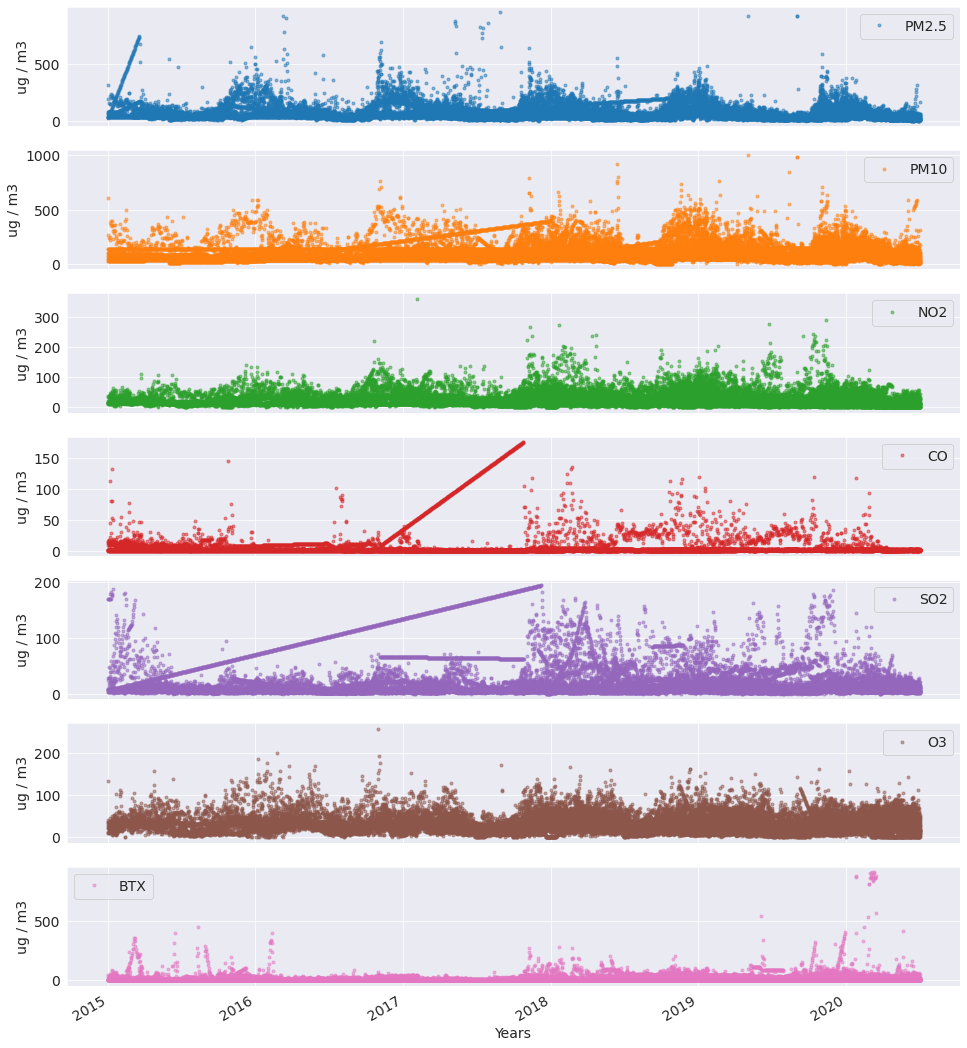

In [29]:
air_pollution_df1.set_index('Date',inplace=True) #Setting the Date field as an index
axes = air_pollution_df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

## Lets answer some of the questions

#### 1.Which city has recorded the highest value of AQI ?

In [30]:
#Lets check the AQI(Air Quality Index) of the highly polluted city. 
Max = air_pollution_df1.AQI.max()
air_pollution_df1[air_pollution_df1.AQI == Max]

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
Date,,,,,,,,,,,,,,
2018-02-19,Ahmedabad,242.66,141.54,132.47,199.17,246.03,26.64,132.47,127.725,44.06,2049.0,Severe,9.76,384.2


#### 2.List of cities that has recorded severe AQI(Air Quality Index) above 400 ?

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [31]:
#Highly polluted cities
highly_polluted_cities = air_pollution_df1.loc[air_pollution_df1.AQI > 400][["City","AQI","Particulate_Matter","AQI_Bucket"]]
# top_polluted_cities  = air_pollution_df1[air_pollution_df1['Date'] >= '2019-01-01']
highly_polluted_cities.City.unique()

array(['Ahmedabad', 'Amritsar', 'Chennai', 'Delhi', 'Gurugram',
       'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kolkata',
       'Lucknow', 'Patna', 'Talcher'], dtype=object)

In [32]:
air_pollution_df1

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
Date,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,209.0,Nill,0.02,214.78
2015-01-02,Ahmedabad,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,209.0,Nill,12.95,214.78
2015-01-03,Ahmedabad,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,209.0,Nill,25.45,214.78
2015-01-04,Ahmedabad,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,209.0,Nill,15.57,214.78
2015-01-05,Ahmedabad,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,209.0,Nill,28.68,214.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good,15.04,65.96
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory,3.33,98.47
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory,0.02,88.64


#### 3.List of cities that has recorded least or good AQI(Air Quality Index) ?

In [33]:
#Cities that has least or good AQI 
non_polluted_cities = air_pollution_df1.loc[air_pollution_df1.AQI <= 50][["City","AQI","Particulate_Matter","AQI_Bucket"]]
# top_polluted_cities  = air_pollution_df1[air_pollution_df1['Date'] >= '2019-01-01']
non_polluted_cities.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kolkata', 'Lucknow', 'Mumbai', 'Shillong',
       'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'], dtype=object)

## Converting the dataset into yearly data and storing in the variable yearky_data_df

In [34]:
yearly_data_df = air_pollution_df1.resample('1Y').mean()
yearly_data_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,BTX,Particulate_Matter
Date,,,,,,,,,,,,
2015-12-31,81.776173,91.501922,17.911905,22.504498,35.628811,26.099350,4.286493,18.356471,33.085613,187.083844,17.682868,173.278095
2016-12-31,84.968854,99.907728,24.317513,29.202648,35.220849,30.239452,2.522507,20.650733,36.474317,191.992210,10.126846,184.876582
2017-12-31,80.541481,118.377288,28.567942,27.580553,27.557142,25.976609,7.790658,26.771535,30.577414,170.070007,7.948030,198.918769
2018-12-31,72.761351,122.484772,20.616362,31.851285,37.808497,22.395433,2.911844,20.556934,34.751805,177.529050,15.314238,195.246123
2019-12-31,57.933985,109.575359,16.366049,27.951419,34.988116,21.182808,2.248677,16.464237,32.955880,154.083732,16.662690,167.509344
2020-12-31,44.022224,88.719509,20.102992,20.105252,31.192141,19.474975,1.162785,11.991988,34.089738,113.006141,16.972611,132.741734


## Visualizing the average AQI form the year 2015 to 2020

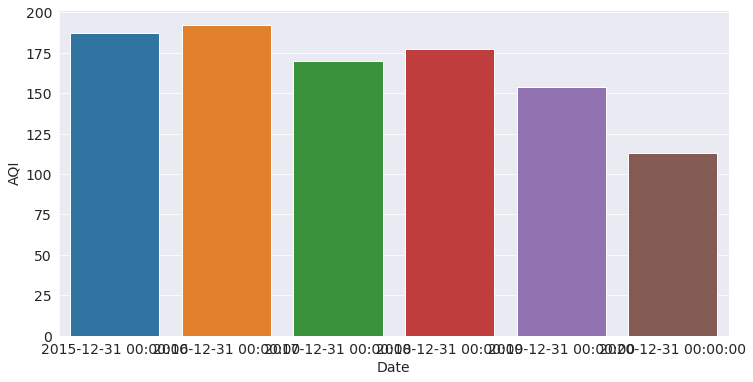

In [35]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
sns.barplot(x = yearly_data_df.index,y = "AQI", data = yearly_data_df)

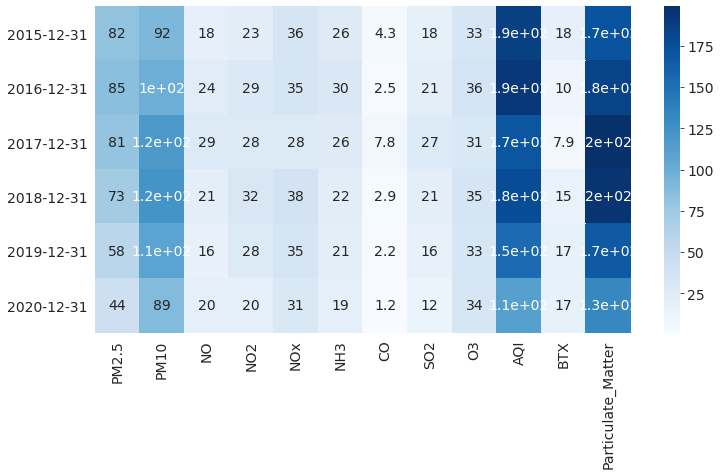

In [36]:
#Visualizing using a heatmap
yearly_data_df.index = yearly_data_df.index.date
yearly_data_df.index
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_data_df, annot=True, cmap='Blues')

Let us save and upload our work to Jovian before continuing

In [37]:
import jovian

In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'

## Extracting only the Bengaluru data from the dataset



In [39]:
#Analysing the AQI in Bengaluru City
Bengaluru_Data = air_pollution_df1.loc[air_pollution_df1['City'] == "Bengaluru"]
Bengaluru_Data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
Date,,,,,,,,,,,,,,
2015-01-01,Bengaluru,57.327975,100.891833,3.26,17.33,10.88,20.36,0.33,3.54,10.73,78.1625,Nill,14.018557,158.219807
2015-01-02,Bengaluru,56.985949,100.793666,6.05,19.73,14.14,23.74,1.35,3.97,22.77,78.3250,Nill,14.777115,157.779615
2015-01-03,Bengaluru,56.643924,100.695498,11.91,19.88,20.72,4.32,17.40,13.61,12.03,78.4875,Nill,28.595672,157.339422
2015-01-04,Bengaluru,56.301899,100.597331,7.45,21.61,16.88,0.87,5.05,6.52,17.70,78.6500,Nill,16.834229,156.899230
2015-01-05,Bengaluru,55.959873,100.499164,9.52,22.17,21.76,31.38,1.83,4.71,12.72,78.8125,Nill,13.572787,156.459037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Bengaluru,16.600000,29.480000,3.06,13.68,13.07,6.88,0.67,7.29,15.69,51.0000,Satisfactory,7.317399,46.080000
2020-06-28,Bengaluru,20.440000,26.340000,2.69,10.33,10.58,6.58,0.66,6.60,17.59,61.0000,Satisfactory,6.985956,46.780000
2020-06-29,Bengaluru,28.680000,29.270000,3.62,12.12,12.94,6.80,0.56,6.33,16.99,65.0000,Satisfactory,7.264513,57.950000


## Updating the missing values by considering only the AQI value from the above table.

In [40]:
#Updating the missing values of AQU_Bucket column.
for index,city in Bengaluru_Data.iterrows():
    if city.AQI_Bucket == "Nill":
        if 0 <= city.AQI  <= 50:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Good"
        if 50 < city.AQI  <= 100:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Satisfactory"
        if 100 < city.AQI  <= 200:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Moderate"
        if 200 < city.AQI <= 300:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Poor"
        if 300 < city.AQI  <= 400:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Very Poor"
        if city.AQI > 400:
            Bengaluru_Data.loc[index, 'AQI_Bucket'] = "Severe"
Bengaluru_Data

# https://stackoverflow.com/questions/25478528/updating-value-in-iterrow-for-pandas

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Particulate_Matter
Date,,,,,,,,,,,,,,
2015-01-01,Bengaluru,57.327975,100.891833,3.26,17.33,10.88,20.36,0.33,3.54,10.73,78.1625,Satisfactory,14.018557,158.219807
2015-01-02,Bengaluru,56.985949,100.793666,6.05,19.73,14.14,23.74,1.35,3.97,22.77,78.3250,Satisfactory,14.777115,157.779615
2015-01-03,Bengaluru,56.643924,100.695498,11.91,19.88,20.72,4.32,17.40,13.61,12.03,78.4875,Satisfactory,28.595672,157.339422
2015-01-04,Bengaluru,56.301899,100.597331,7.45,21.61,16.88,0.87,5.05,6.52,17.70,78.6500,Satisfactory,16.834229,156.899230
2015-01-05,Bengaluru,55.959873,100.499164,9.52,22.17,21.76,31.38,1.83,4.71,12.72,78.8125,Satisfactory,13.572787,156.459037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Bengaluru,16.600000,29.480000,3.06,13.68,13.07,6.88,0.67,7.29,15.69,51.0000,Satisfactory,7.317399,46.080000
2020-06-28,Bengaluru,20.440000,26.340000,2.69,10.33,10.58,6.58,0.66,6.60,17.59,61.0000,Satisfactory,6.985956,46.780000
2020-06-29,Bengaluru,28.680000,29.270000,3.62,12.12,12.94,6.80,0.56,6.33,16.99,65.0000,Satisfactory,7.264513,57.950000


#### 4.Visualize the AQI_category in Bengaluru data using counterplot ?

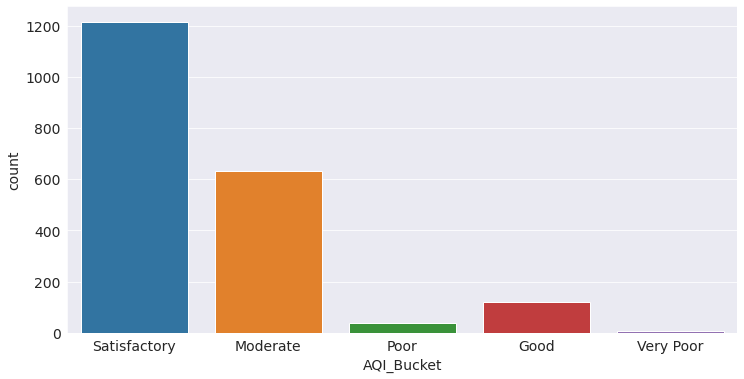

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'AQI_Bucket', data = Bengaluru_Data)

#### 5.Visualize the carbon monoxide pollutant in Bangalore

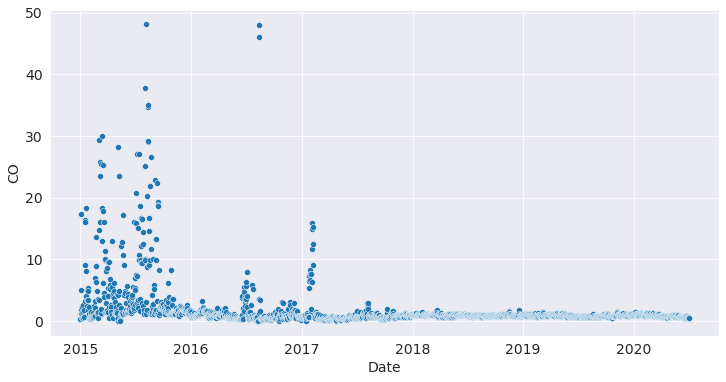

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = Bengaluru_Data.index,y = Bengaluru_Data.CO)

### Extracting Monthly data of Bangalore city.

In [43]:
Bengaluru_Monthly = Bengaluru_Data.resample('1M').mean()
Bengaluru_Monthly

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,BTX,Particulate_Matter
Date,,,,,,,,,,,,
2015-01-31,52.197595,99.419325,13.241935,18.956774,20.400968,18.968387,4.619677,17.240968,23.054032,80.600000,44.618046,151.616920
2015-02-28,42.107848,96.523392,8.996071,24.082143,18.245000,14.563929,2.349643,7.397143,37.042857,85.393750,71.314715,138.631240
2015-03-31,38.948220,93.627460,7.197419,21.943226,17.754516,21.133871,10.910323,8.776129,50.837742,103.931452,187.155185,132.575679
2015-04-30,28.666000,90.633360,3.894333,8.882000,10.627000,23.616000,3.783000,8.305667,63.819667,113.733333,22.956296,119.299360
2015-05-31,33.549032,87.639260,5.837419,22.296129,13.743226,11.866774,5.320645,5.268710,29.431613,102.774194,23.946052,121.188293
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,38.193226,79.966452,4.790968,21.364194,23.149032,12.523226,0.943226,6.867097,44.945484,90.741935,7.948900,118.159677
2020-04-30,24.931667,46.863000,2.886667,11.981000,13.224333,10.953000,0.724000,5.991000,40.517333,68.533333,11.302327,71.794667
2020-05-31,21.269677,59.758710,3.706774,15.389032,15.594194,8.918065,0.780000,6.478065,32.435806,73.161290,7.936702,81.028387


#### 6.Visualize the AQI in Bangalore city using the Monthly data ?

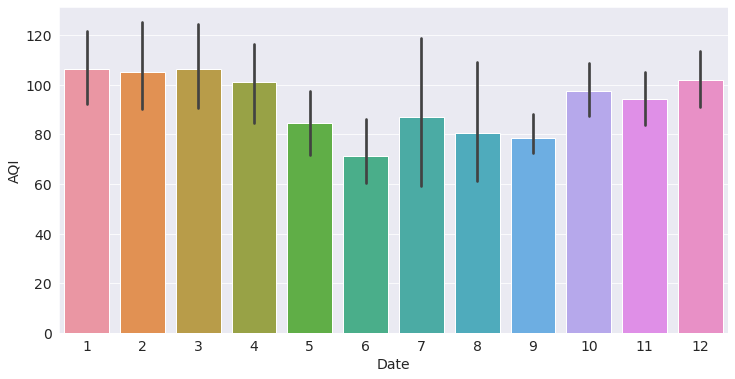

In [44]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
sns.barplot(x = Bengaluru_Monthly.index.month,y = "AQI", data = Bengaluru_Monthly)

In [45]:
import jovian

In [46]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'

## Inferences and Conclusion

**From the above analysis we can conclude that the airpollution has been drastically reduced this year (2020). Ahmehadabad was the highly air polluted city. Shilling was the least polluted.**

In [47]:
import jovian

In [48]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'

## References and Future Work

#### References:
     Numpy: https://numpy.org/
 
     Pandas: https://pandas.pydata.org/

     Matplotlib :https://matplotlib.org/

     Seaborn : https://seaborn.pydata.org/

     stackoverflow references: https://stackoverflow.com/questions/25478528/updating-value-in-iterrow-for-pandas

Future Work:
Here we have analysed only one city (Bengaluru). We can analyse for many cities and know how the cities have been polluted from years .

In [49]:
import jovian

In [50]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/thechandramohan01/air-quality-data-in-india


'https://jovian.ai/thechandramohan01/air-quality-data-in-india'